# Carga y Exploración inicial de Datos

In [ ]:
# Cargo el dataset
import pandas as pd
df = pd.read_csv('../Data/insurance.csv')
#Confirmo que se hayan cargado correctamente los datos
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
#Ahora realizo una exploración inicial para entender la estructura del dataset y las características
#disponibles
#Veo la cantidad de datos nulos
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#No tenemos datos nulos. Ahora veo los tipos de datos
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
#Cambiaré algunos tipos de datos
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
#Ahora verifico los cambios
print(df.dtypes)


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region        object
charges      float64
dtype: object


In [ ]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']
['yes', 'no']
Categories (2, object): ['no', 'yes']
['southwest' 'southeast' 'northwest' 'northeast']


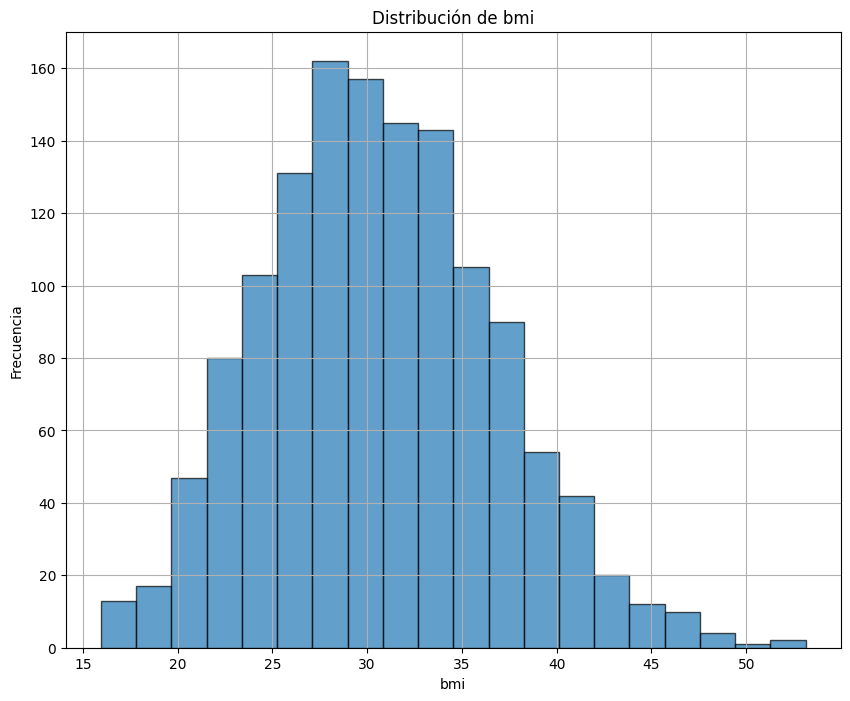

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df['bmi'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de bmi')
plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

In [ ]:
import plotly.express as px

fig = px.box(df, y = 'charges', title='Distribución de charges')
fig.show()

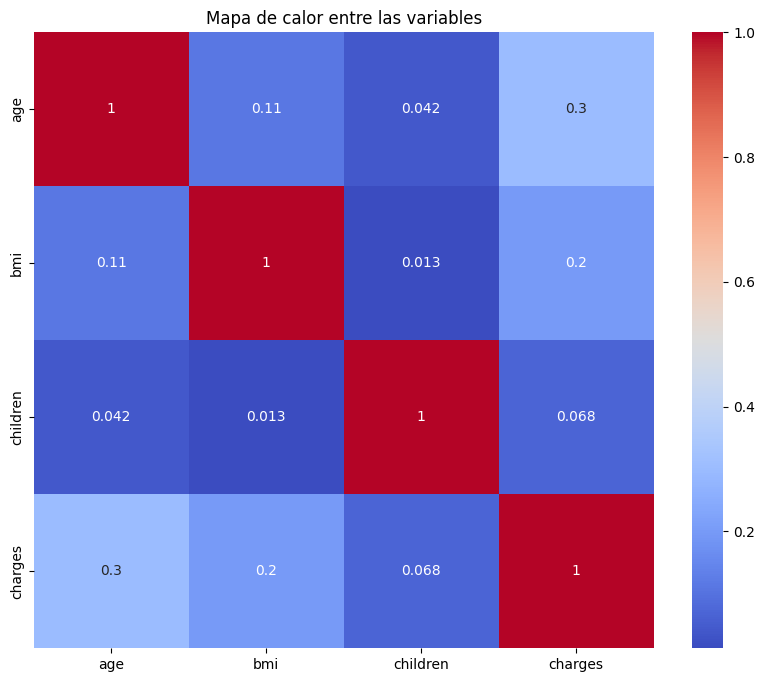

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

# Preprocesamiento de datos / Implementación de modelos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


#Separación de la variable objetivo a binaria
df['charges'] = df['charges'].apply(lambda x:1 if x >= 9500 else 0)
#Con esto digo que a partir de 9500 el costo es alto, por deba

#Selecciono la variable objetivo y la separo
X = df.drop('charges', axis = 1) #Con esto selecciono todas las columnas, excepto charges
y = df['charges'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['category', 'object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression()) 
])

#Ahora creo el modelo de KNN
pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

#Ahora hago el árbol de decisión
pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

#Entreno los modelos LR y KNN
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

print(f'Accuracy Logistic Regression: {accuracy_LR}')
print(f'Accuracy K-Nearest Neighbors: {accuracy_KNN}')
print(f'Accuracy Decision Tree: {accuracy_DT}')

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       148
           1       0.87      0.93      0.90       120

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       148
           1       0.87      0.91      0.89       120

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       148
           1       0.83      0.90      0.86       120

    accuracy                           0.87       268
   macro avg  

# Optimización de Hiperparámetros

In [17]:
from sklearn.model_selection import GridSearchCV

# Configurar hiperparámetros para los modelos
param_grid_lr = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5]
}

# Hago GridSearchCV para los modelos
grid_search_lr = GridSearchCV(estimator=pipeline_LR, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

grid_search_knn = GridSearchCV(estimator=pipeline_KNN, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

grid_search_dt = GridSearchCV(estimator=pipeline_DT, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

#Muestro los mejores resultados de los modelos
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

{
    'Logistic Regression': {'Best Params': best_params_lr, 'Best Score': best_score_lr},
    'K-Nearest Neighbors': {'Best Params': best_params_knn, 'Best Score': best_score_knn},
    'Decision Tree': {'Best Params': best_params_dt, 'Best Score': best_score_dt}
}


{'Logistic Regression': {'Best Params': {'classifier__C': 1.0,
   'classifier__penalty': 'l1',
   'classifier__solver': 'liblinear'},
  'Best Score': np.float64(0.9018691588785046)},
 'K-Nearest Neighbors': {'Best Params': {'classifier__metric': 'manhattan',
   'classifier__n_neighbors': 9,
   'classifier__weights': 'distance'},
  'Best Score': np.float64(0.894392523364486)},
 'Decision Tree': {'Best Params': {'classifier__criterion': 'gini',
   'classifier__max_depth': 10,
   'classifier__min_samples_leaf': 2,
   'classifier__min_samples_split': 2},
  'Best Score': np.float64(0.9093457943925234)}}

# Evaluación de Modelos

In [19]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Ahora hago las predicciones con los modelos optimizados
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

#Evaluo los modelos
accuracy_lr_optimizado = accuracy_score(y_test, y_pred_lr)
accuracy_knn_optimizado = accuracy_score(y_test, y_pred_knn)
accuracy_dt_optimizado = accuracy_score(y_test, y_pred_dt)

#Imprimo
print(f'Exactitud del modelo LR optimizado:{accuracy_lr_optimizado}')
print(f'Exactitud del modelo KNN optimizado:{accuracy_knn_optimizado}')
print(f'Exactitud del modelo DT optimizado:{accuracy_dt_optimizado}')

Exactitud del modelo LR optimizado:0.9067164179104478
Exactitud del modelo KNN optimizado:0.917910447761194
Exactitud del modelo DT optimizado:0.9253731343283582


In [20]:
#Informe de clasificación
print(f'Informe de Clasificación de LR optimizado: ')
print(classification_report(y_test, y_pred_lr))

Informe de Clasificación de LR optimizado: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       148
           1       0.87      0.93      0.90       120

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



In [21]:
print(f'Informe de Clasificación de KNN optimizado: ')
print(classification_report(y_test, y_pred_knn))

Informe de Clasificación de KNN optimizado: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       148
           1       0.90      0.92      0.91       120

    accuracy                           0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268



In [22]:
print(f'Informe de Clasificación de DT optimizado: ')
print(classification_report(y_test, y_pred_dt))

Informe de Clasificación de DT optimizado: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.94      0.89      0.91       120

    accuracy                           0.93       268
   macro avg       0.93      0.92      0.92       268
weighted avg       0.93      0.93      0.93       268



In [23]:
# Matriz de Confusión
print('Matriz de Confusión de LR optimizado:')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

Matriz de Confusión de LR optimizado:
[[132  16]
 [  9 111]]


In [24]:
print('Matriz de Confusión de KNN optimizado:')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

Matriz de Confusión de KNN optimizado:
[[136  12]
 [ 10 110]]


In [25]:
print('Matriz de Confusión de DT optimizado:')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

Matriz de Confusión de DT optimizado:
[[141   7]
 [ 13 107]]
